<a href="https://colab.research.google.com/github/Kowcikaasai/Test1/blob/main/Model_RR_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import packages and classes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Diabetes data set from scikit-learn.

Loading data

In [ ]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
x = data.data
y = data.target

Creating a Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

Model fitting

In [ ]:
L.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = L.predict(x_test)
y_pred

array([ 90.63775064, 170.71193806, 234.5577504 , 117.31915346,
       124.00402989, 184.81667457, 226.62107027, 188.63204229,
       251.06174028, 130.27473788, 232.55508864,  95.85259803,
       122.13836852, 141.71797601, 185.020297  , 218.02285001,
       229.63510566, 108.31017935, 145.53707545,  50.9801537 ,
       190.92554361,  45.52219745, 161.5893172 , 211.22670844,
       193.90589594, 188.02965279,  65.01386486, 239.67387607,
       159.14623569, 150.61361234, 197.00636859, 135.79323252,
        68.22047151,  61.96728654, 228.23911155, 171.0196623 ,
       178.76296594, 149.10989294, 194.52370706,  53.62174033,
        68.15206383, 181.30819122, 118.23977613,  64.75654602,
       158.84847034, 117.95863494,  90.4499287 , 210.53513911,
       157.33753941,  85.76063635, 160.64975014, 143.42385233,
       121.20132823, 173.16327226, 231.34412247, 188.14425916,
       237.81964522,  76.82978608, 185.79497526,  91.89717743,
        91.70019662, 110.76100182, 155.75107551,  78.33

R2 and Mean squared error

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 score',r2_score(y_test, y_pred))
print('Mean squared error', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.4206577759960365
Mean squared error 57.81374770864569


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
#R = Ridge(alpha=0.0001)
R = Ridge(alpha=0.1)

In [ ]:
R.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred1 = R.predict(x_test)

In [ ]:
print('R2 score',r2_score(y_test, y_pred1))
print('Mean squared error', np.sqrt(mean_squared_error(y_test, y_pred1)))

R2 score 0.4392193345479556
Mean squared error 56.88006023717114


# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [ ]:
RR=Ridge()
RR

Ridge()

In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [ ]:
Grid1.fit(x,y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [ ]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=0.001)

In [ ]:
BestRR.fit(x_train, y_train)

Ridge(alpha=0.001)

In [ ]:
y_pred2 = BestRR.predict(x_test)
y_pred2

array([ 91.5038546 , 170.8714129 , 234.42263985, 116.96901529,
       123.73584778, 184.96818818, 225.53714772, 188.42886187,
       251.05694646, 130.36718009, 232.17624725,  95.80394391,
       121.98200245, 141.49727827, 184.67367613, 218.09931993,
       233.19214001, 108.0031035 , 144.94361338,  51.03061562,
       190.43460939,  45.9020162 , 160.78840829, 211.0184182 ,
       194.54753929, 187.69611372,  66.05201979, 239.38124943,
       158.74263966, 150.17672177, 196.34957283, 135.78795895,
        68.42862031,  62.20851738, 227.78187332, 170.65255668,
       178.34691885, 148.99640187, 193.7462803 ,  54.68640457,
        68.26639384, 182.22724914, 118.04575732,  65.69701582,
       162.58543848, 117.72610857,  90.58794875, 210.44042346,
       156.99322541,  86.08226305, 160.58693624, 143.47548736,
       120.83621399, 172.59628238, 230.84770006, 187.58578437,
       237.12698551,  77.03519435, 186.08384583,  92.29798026,
        91.89541618, 110.20675902, 156.04950058,  79.30

In [ ]:
BestRR.score(x,y)

0.5114354188941219

In [ ]:
%matplotlib inline
import seaborn as sns

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    #ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    #ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    ax1 = sns.distplot(RedFunction, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Value of x')
    plt.ylabel('Value of y')

    plt.show()
    plt.close()

<ipython-input-84-c0ec611fcaa1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, color="r", label=RedName)
<ipython-input-84-c0ec611fcaa1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, color="b", label=BlueName, ax=ax1)


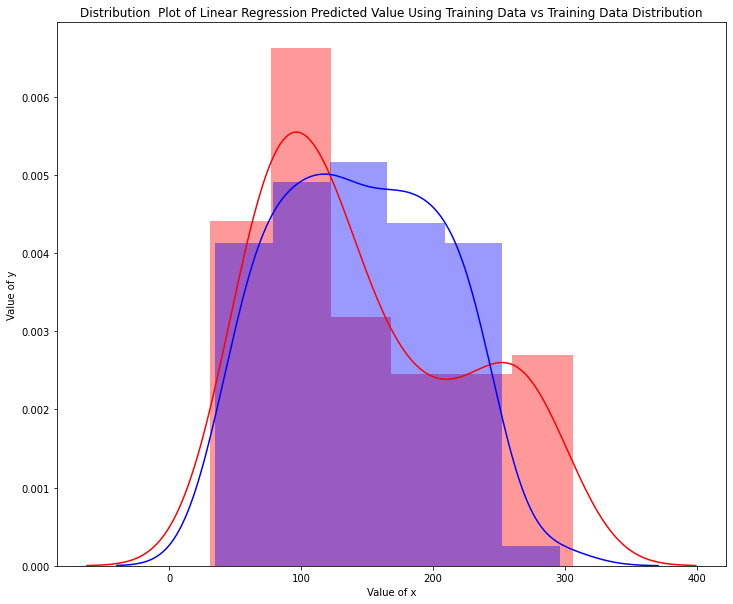

In [ ]:
Title = 'Distribution  Plot of Linear Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-84-c0ec611fcaa1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, color="r", label=RedName)
<ipython-input-84-c0ec611fcaa1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, color="b", label=BlueName, ax=ax1)


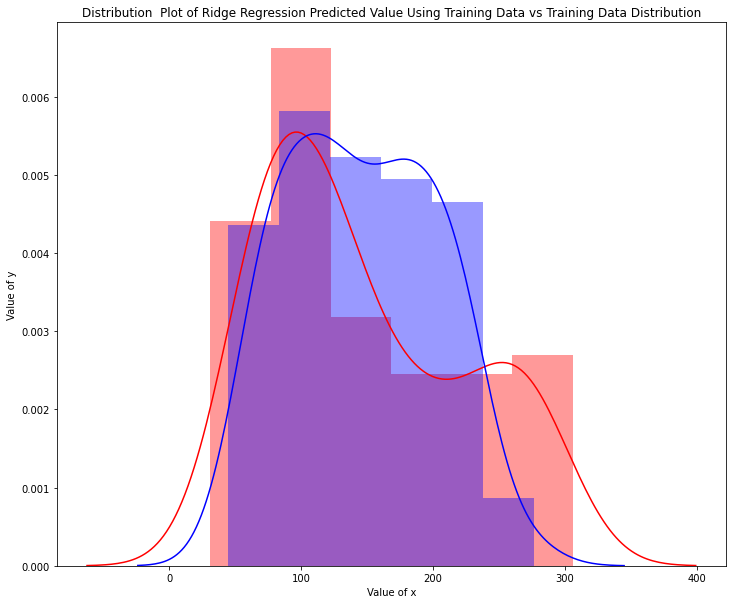

In [ ]:
Title = 'Distribution  Plot of Ridge Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred1, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-84-c0ec611fcaa1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, color="r", label=RedName)
<ipython-input-84-c0ec611fcaa1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, color="b", label=BlueName, ax=ax1)


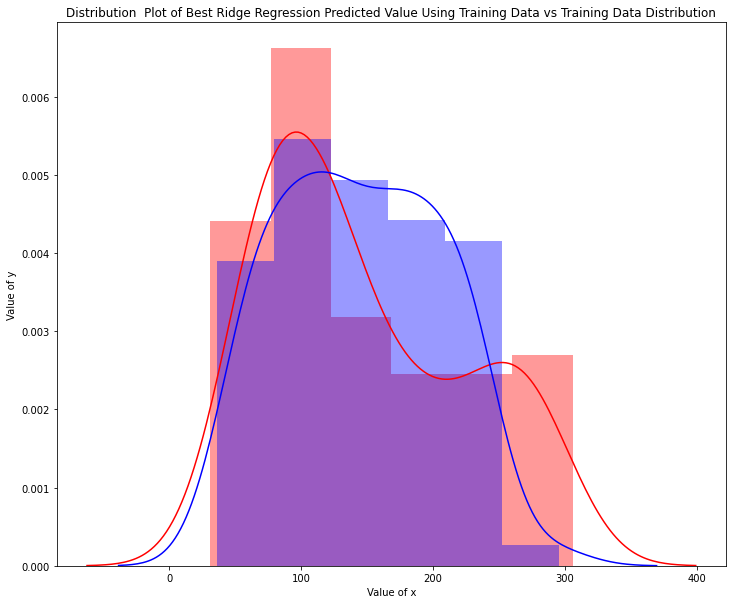

In [ ]:
Title = 'Distribution  Plot of Best Ridge Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred2, "Actual Values (Train)", "Predicted Values (Train)", Title)